In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# 파일 읽어 오기

In [53]:
c_t = pd.read_csv('corona_table.csv')
c_t

,기준일,확진자수,누적확진자수,누적사망자수,사망자수,누적의심신고검사자수
0,2020-01-20,1,1,0,0,4
1,2020-01-21,0,1,0,0,15
2,2020-01-22,0,1,0,0,21
3,2020-01-23,0,1,0,0,25
4,2020-01-24,1,2,0,0,29
...,...,...,...,...,...,...
737,2022-01-27,14514,777483,6654,34,21196354
738,2022-01-28,16093,793576,6678,24,21269304
739,2022-01-29,17513,811089,6712,34,21377393
740,2022-01-30,17522,828611,6732,20,21448119


In [4]:
#datetime은 문자열로 저장
c_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기준일         742 non-null    object
 1   확진자수        742 non-null    int64 
 2   누적확진자수      742 non-null    int64 
 3   누적사망자수      742 non-null    int64 
 4   사망자수        742 non-null    int64 
 5   누적의심신고검사자수  742 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 34.9+ KB


In [5]:
c_t.describe()

,확진자수,누적확진자수,누적사망자수,사망자수,누적의심신고검사자수
count,742.000000,742.000000,742.000000,742.000000,7.420000e+02
mean,1139.741240,145006.866577,1513.570081,9.103774,7.039078e+06
std,2025.965124,183545.051560,1519.515163,15.627539,6.250732e+06
min,0.000000,1.000000,0.000000,0.000000,4.000000e+00
25%,77.250000,14007.250000,298.000000,1.000000,1.512404e+06
50%,461.000000,75687.500000,1365.500000,3.000000,5.399422e+06
75%,1419.250000,196368.500000,2088.000000,8.000000,1.167160e+07
max,17522.000000,845688.000000,6755.000000,109.000000,2.151807e+07


## 기준일 타입 변경

In [6]:
c_t.기준일=c_t.기준일.astype('datetime64[ns]')

In [7]:
c_t.dtypes

기준일           datetime64[ns]
확진자수                   int64
누적확진자수                 int64
누적사망자수                 int64
사망자수                   int64
누적의심신고검사자수             int64
dtype: object

In [8]:
#확진자가 가장 많이 발생한 날
c_t.sort_values(by='확진자수')[-1:]

,기준일,확진자수,누적확진자수,누적사망자수,사망자수,누적의심신고검사자수
740,2022-01-30,17522,828611,6732,20,21448119


In [9]:
c_t.sort_values(by='사망자수')[-1:]

,기준일,확진자수,누적확진자수,누적사망자수,사망자수,누적의심신고검사자수
702,2021-12-23,6914,589961,5015,109,18859285


2020년 1월 20일 ~ 2022년 1월 31일 기간 중 
확진자 수가 가장 높았던 날은 2022년 1월 30일 17,522명이고,
사망자 수가 가장 높았던 날은 2021년 12월 23일 109명이었다.

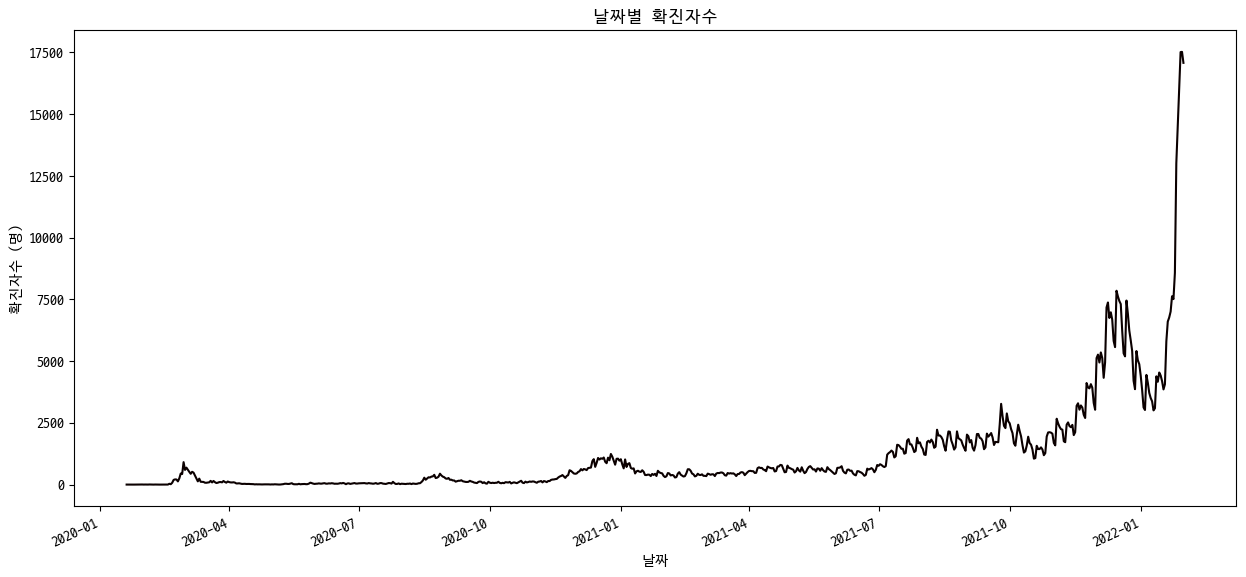

In [10]:
#일별 확진자수 시각화
plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['axes.unicode_minus'] = False
c_t.plot(
    x='기준일',
    y='확진자수',
    figsize=(15,7),
    legend=False,
    rot=25,
    title='날짜별 확진자수',
    xlabel='날짜',
    ylabel='확진자수 (명)',
    colormap='hot',
)
# x축 눈금 레이블 : 가운데 정렬
# ha = ['right,'left','center']
plt.xticks(ha='right')
plt.show()

<Axes: xlabel='기준일', ylabel='확진자수'>

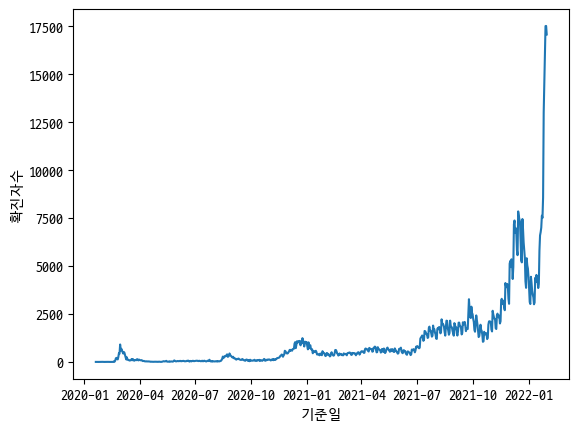

In [11]:
sns.lineplot(
    c_t,
    x='기준일',
    y='확진자수'
)

<Axes: xlabel='기준일', ylabel='사망자수'>

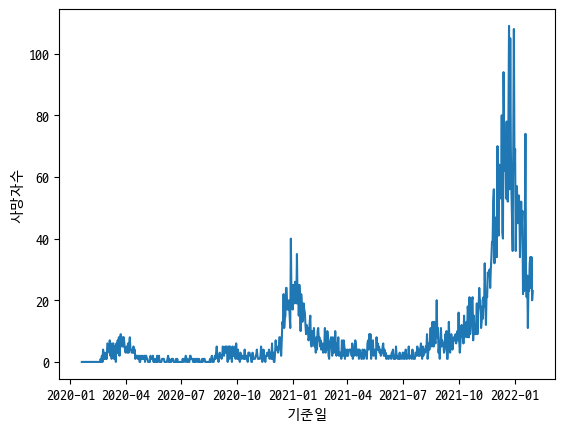

In [12]:
sns.lineplot(
    c_t,
    x='기준일',
    y='사망자수',
)

<Axes: xlabel='기준일'>

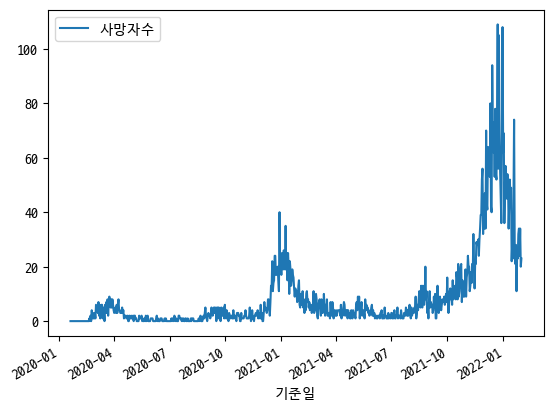

In [13]:
c_t.plot(
    x='기준일',
    y='사망자수',
)

<Axes: >

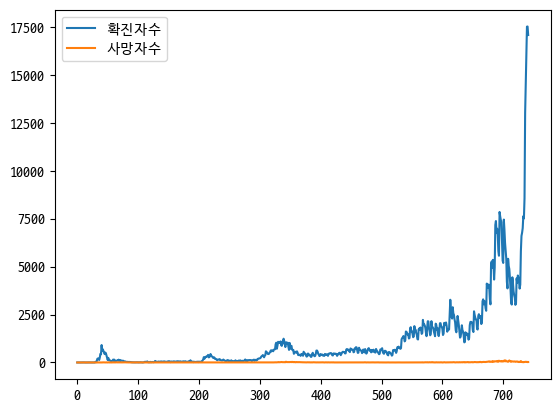

In [14]:
#날짜별 확진자 수와 사망자 수
c_t[['확진자수','사망자수']].plot()

<Axes: title={'center': '날짜별 확진자수와 사망자수'}, xlabel='날짜'>

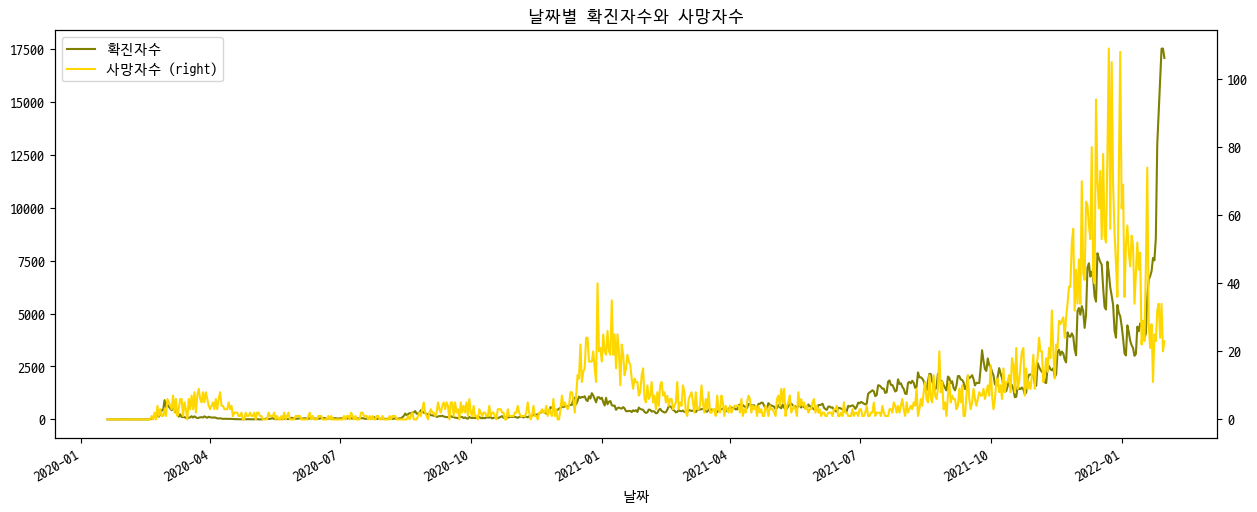

In [15]:
c_t[['기준일','확진자수','사망자수']].plot(
    x='기준일',
    figsize=(15,6),
    color=['olive','gold'],
    secondary_y='사망자수',
    xlabel = '날짜',
    title = '날짜별 확진자수와 사망자수'
    
)

In [16]:
c_t.기준일.dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
737    2022
738    2022
739    2022
740    2022
741    2022
Name: 기준일, Length: 742, dtype: int32

In [17]:
c_t.기준일.dt.month

0      1
1      1
2      1
3      1
4      1
      ..
737    1
738    1
739    1
740    1
741    1
Name: 기준일, Length: 742, dtype: int32

In [18]:
c_t.기준일.dt.day

0      20
1      21
2      22
3      23
4      24
       ..
737    27
738    28
739    29
740    30
741    31
Name: 기준일, Length: 742, dtype: int32

In [19]:
g_y=c_t.groupby(c_t.기준일.dt.year)

In [20]:
for i in g_y:
    print(i)

(2020,            기준일  확진자수  누적확진자수  누적사망자수  사망자수  누적의심신고검사자수
0   2020-01-20     1       1       0     0           4
1   2020-01-21     0       1       0     0          15
2   2020-01-22     0       1       0     0          21
3   2020-01-23     0       1       0     0          25
4   2020-01-24     1       2       0     0          29
..         ...   ...     ...     ...   ...         ...
341 2020-12-27   970   56859     808    15     4006406
342 2020-12-28   806   57665     819    11     4038300
343 2020-12-29  1044   58709     859    40     4098173
344 2020-12-30  1050   59759     879    20     4159516
345 2020-12-31   967   60726     900    21     4213874

[346 rows x 6 columns])
(2021,            기준일  확진자수  누적확진자수  누적사망자수  사망자수  누적의심신고검사자수
346 2021-01-01  1027   61753     917    17     4269312
347 2021-01-02   820   62573     942    25     4302792
348 2021-01-03   657   63230     962    20     4340832
349 2021-01-04  1020   64250     981    19     4376602
350 2021-01-05   714   649

In [21]:
g_y.get_group(2020)

,기준일,확진자수,누적확진자수,누적사망자수,사망자수,누적의심신고검사자수
0,2020-01-20,1,1,0,0,4
1,2020-01-21,0,1,0,0,15
2,2020-01-22,0,1,0,0,21
3,2020-01-23,0,1,0,0,25
4,2020-01-24,1,2,0,0,29
...,...,...,...,...,...,...
341,2020-12-27,970,56859,808,15,4006406
342,2020-12-28,806,57665,819,11,4038300
343,2020-12-29,1044,58709,859,40,4098173
344,2020-12-30,1050,59759,879,20,4159516


In [22]:
g_y.indices

{2020: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 17

In [23]:
#년합을 numeric_only=True 로 문자 제거로 한다.

In [24]:
g_y.sum(numeric_only=True)[['확진자수','사망자수']]

,확진자수,사망자수
기준일,,
2020,60726,900
2021,570102,4663
2022,214860,1192


In [25]:
# 월별 합
c_t.groupby(c_t.기준일.dt.month).sum(numeric_only=True)[['확진자수','사망자수']]

,확진자수,사망자수
기준일,,
1,232342,1712
2,14387,199
3,20270,274
4,19906,182
5,19034,154
6,17954,71
7,42880,96
8,58720,213
9,63728,285


In [26]:
g_m=c_t.groupby(c_t.기준일.dt.month)

In [27]:
g_m.sum(numeric_only=True).sort_values(by='확진자수',ascending=False)[:1]

,확진자수,누적확진자수,누적사망자수,사망자수,누적의심신고검사자수
기준일,,,,,
1,232342,24111724,231918,1712,789492003


In [61]:
g_m.sum(numeric_only=True).sort_values(by='사망자수',ascending=False)[:1]

,확진자수,누적확진자수,누적사망자수,사망자수,누적의심신고검사자수
기준일,,,,,
12,210133,18264020,161284,2313,679190252


## 년 월별 
- 형식 지정하기

In [28]:
c_t.기준일.dt.strftime('%y')

0      20
1      20
2      20
3      20
4      20
       ..
737    22
738    22
739    22
740    22
741    22
Name: 기준일, Length: 742, dtype: object

In [29]:
c_t.기준일.dt.strftime('%Y')

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
737    2022
738    2022
739    2022
740    2022
741    2022
Name: 기준일, Length: 742, dtype: object

In [30]:
c_t.기준일.dt.strftime('%m')

0      01
1      01
2      01
3      01
4      01
       ..
737    01
738    01
739    01
740    01
741    01
Name: 기준일, Length: 742, dtype: object

In [31]:
c_t.기준일.dt.strftime('%d')

0      20
1      21
2      22
3      23
4      24
       ..
737    27
738    28
739    29
740    30
741    31
Name: 기준일, Length: 742, dtype: object

In [32]:
c_t.기준일.dt.strftime('%D')

0      01/20/20
1      01/21/20
2      01/22/20
3      01/23/20
4      01/24/20
         ...   
737    01/27/22
738    01/28/22
739    01/29/22
740    01/30/22
741    01/31/22
Name: 기준일, Length: 742, dtype: object

In [33]:
c_t.기준일.dt.strftime('%Y%m')

0      202001
1      202001
2      202001
3      202001
4      202001
        ...  
737    202201
738    202201
739    202201
740    202201
741    202201
Name: 기준일, Length: 742, dtype: object

In [45]:
g_y_m =c_t.groupby(c_t.기준일.dt.strftime('%Y/%m'))

In [46]:
g_y_m.size()

기준일
2020/01    12
2020/02    29
2020/03    31
2020/04    30
2020/05    30
2020/06    30
2020/07    31
2020/08    31
2020/09    30
2020/10    31
2020/11    30
2020/12    31
2021/01    31
2021/02    28
2021/03    31
2021/04    30
2021/05    31
2021/06    30
2021/07    31
2021/08    31
2021/09    30
2021/10    31
2021/11    30
2021/12    31
2022/01    31
dtype: int64

In [47]:
#년-월 기준으로 사망자수가 가장 높았던 

In [63]:
g_y_m.sum(numeric_only=True).sort_values(by='확진자수',ascending=False)[:1]

,확진자수,누적확진자수,누적사망자수,사망자수,누적의심신고검사자수
기준일,,,,,
2022/01,214860,21908081,194438,1192,634968707


In [64]:
g_y_m.sum(numeric_only=True).sort_values(by='사망자수',ascending=False)[:1]

,확진자수,누적확진자수,누적사망자수,사망자수,누적의심신고검사자수
기준일,,,,,
2021/12,183606,16828211,140974,1939,568932067


In [ ]:
확진자 수가 가장 높았던 달은 2022년 1월로 214860명이고,
사망자 수가 가장 높았던 달은 2021년 12월 1939명이다.

In [48]:
len(g_y_m.indices)

25

TypeError: 'range' object is not callable

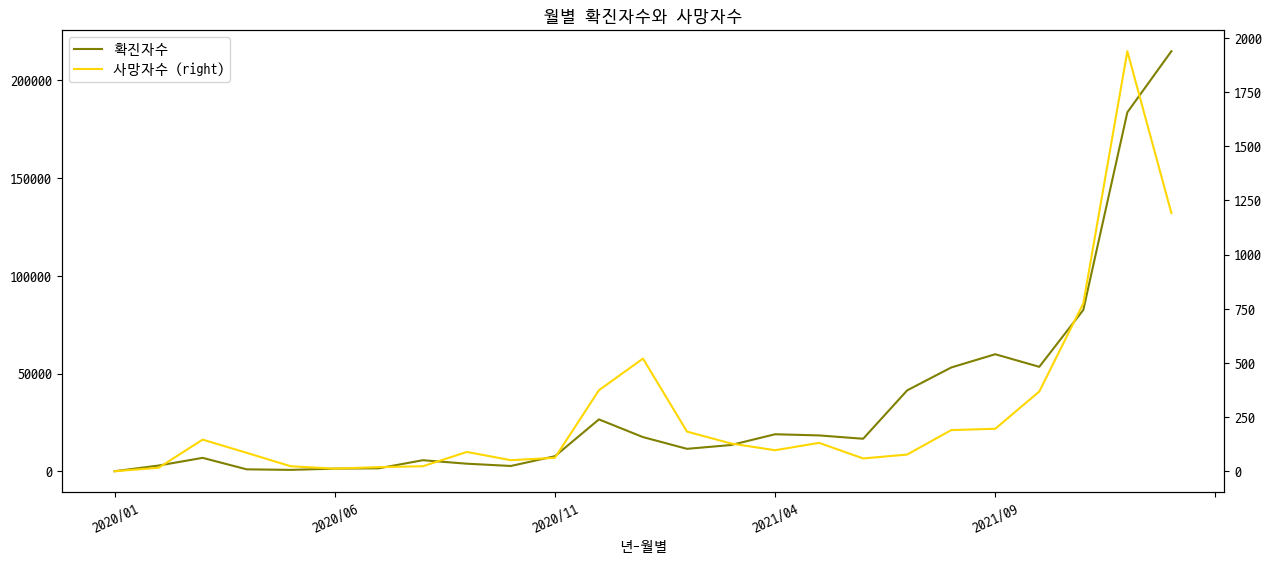

In [65]:
g_y_m[['확진자수','사망자수']].sum(numeric_only=True).plot(
    figsize=(15,6),
    color=['olive','gold'],
    secondary_y='사망자수',
    xlabel = '년-월별',
    title = '월별 확진자수와 사망자수',
    rot=25,
)
plt.xticks(range(len(g_y_m.indices)), labels=g_y_m.indices)
# plt.show() 

In [ ]:
## 월별 확진자 수와 사망자 수가 높았던 날 행 추출

2020년 1월 20일 ~ 2022년 1월 31일 기간 중 

확진자 수가 가장 높았던 날은 2022년 1월 30일 17,522명이고,
사망자 수가 가장 높았던 날은 2021년 12월 23일 109명이었다.

확진자 수가 가장 높았던 달은 2022년 1월로 214860명이고,
사망자 수가 가장 높았던 달은 2021년 12월 1939명이다.